In [1]:
import sys
import os
sys.path.append("..") # 
print("Started")

Started


In [14]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from IPython.display import display, HTML

from vistools.tensorboard_data import TensorboardData
from vistools.tensorboard_vistools import Vistool, PanelTool


%matplotlib inline
%load_ext autoreload
%autoreload 2

/home/wcarvalh/miniconda3/envs/acmejax/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
basepath="/mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/refactor/"

run_data = TensorboardData(
    search_paths=[],
    search_kwargs=dict(
        basepath=basepath,

        njobs=1,
        verbose=1,
    )
)

In [4]:
run_data.load_paths(
    search_paths=[
        # e.g. goto_avoid/settings/seed
        "2022.03.20/*q_lambda*/*",
    ],
    config_file='config.json',
)
run_data.load_settings(config_search='config.json')

print(len(run_data.settings_df))
run_data.settings_df.head()

get_runs: /mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/refactor/2022.03.20/*q_lambda*/*


/mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/refactor/2022.03.20/*q_lambda*/*: 12


loaded: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 73800.07it/s]


Added: 12
12


,path,fullpath,experiment_settings,balance_reward,min_replay_size,batch_size,num_epsilons,npolicies,z_as_train_task,prefetch_size,...,store_lstm_state,loss_coeff,sf_loss,evaluation_epsilon,eval_network,bootstrap_n,sequence_period,num_sgd_steps_per_step,variance,multihead
0,"2022.03.20/agent=usfa,setting=small,exp=q_lamb...",/mnt/brain5/scratch/wcarvalh/projects/rljax/re...,"2022.03.20,agent=usfa,setting=small,exp=q_lamb...",False,10000,32,256,10,False,0,...,True,1.0,n_step_q_learning,0.0,True,5,40,4,0.1,False
1,"2022.03.20/agent=usfa,setting=small,exp=q_lamb...",/mnt/brain5/scratch/wcarvalh/projects/rljax/re...,"2022.03.20,agent=usfa,setting=small,exp=q_lamb...",False,10000,32,256,10,False,0,...,True,1.0,n_step_q_learning_regular,0.0,True,5,40,4,0.1,False
2,"2022.03.20/agent=usfa,setting=small,exp=q_lamb...",/mnt/brain5/scratch/wcarvalh/projects/rljax/re...,"2022.03.20,agent=usfa,setting=small,exp=q_lamb...",False,10000,32,256,10,False,0,...,True,1.0,q_lambda,0.0,True,5,40,4,0.1,False
3,"2022.03.20/agent=usfa,setting=small,exp=q_lamb...",/mnt/brain5/scratch/wcarvalh/projects/rljax/re...,"2022.03.20,agent=usfa,setting=small,exp=q_lamb...",False,10000,32,256,10,False,0,...,True,1.0,q_lambda_regular,0.0,True,5,40,4,0.1,False
4,"2022.03.20/agent=usfa,setting=small,exp=q_lamb...",/mnt/brain5/scratch/wcarvalh/projects/rljax/re...,"2022.03.20,agent=usfa,setting=small,exp=q_lamb...",False,10000,32,256,10,False,0,...,True,1.0,n_step_q_learning,0.0,True,5,40,4,0.1,False


In [11]:
run_data.load_tensorboard(
    njobs=16,
    key_filter=lambda k: 'steps' in k.lower() or 'EpisodeReturn' in k,
    # load_paths=True,
)

settings: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:14<00:00,  1.24s/it]

Keys:
['usfa/EvaluatorSteps',
 'usfa/ActorSteps',
 'usfa/LearnerSteps',
 'usfa/StepsPerSecond',
 'actor/StepsPerSecond',
 'actor/0.Task/0,0,0,1/EpisodeReturn',
 'actor/EvaluatorSteps',
 'actor/0.Task/1,0,0,0/EpisodeReturn',
 'actor/0.Task/0,1,0,0/EpisodeReturn',
 'actor/0.Task/0,0,1,0/EpisodeReturn',
 'actor/LearnerSteps',
 'evaluator/0.Task/0,1,0,0/EpisodeReturn',
 'evaluator/StepsPerSecond',
 'evaluator/ActorSteps',
 'evaluator/0.Task/1,0,0,0/EpisodeReturn',
 'evaluator/0.Task/-1,1,-1,1/EpisodeReturn',
 'evaluator/0.Task/0,0,1,0/EpisodeReturn',
 'evaluator/0.Task/1,1,1,1/EpisodeReturn',
 'evaluator/0.Task/0,0,0,1/EpisodeReturn',
 'evaluator/0.Task/-1,1,0,1/EpisodeReturn',
 'evaluator/0.Task/1,1,0,0/EpisodeReturn',
 'evaluator/LearnerSteps']


,num_seeds,sf_loss,variance,npolicies,duelling
0,1,n_step_q_learning,0.1,10,False
1,1,n_step_q_learning_regular,0.1,10,False
2,1,q_lambda,0.1,10,False
3,1,q_lambda_regular,0.5,10,False


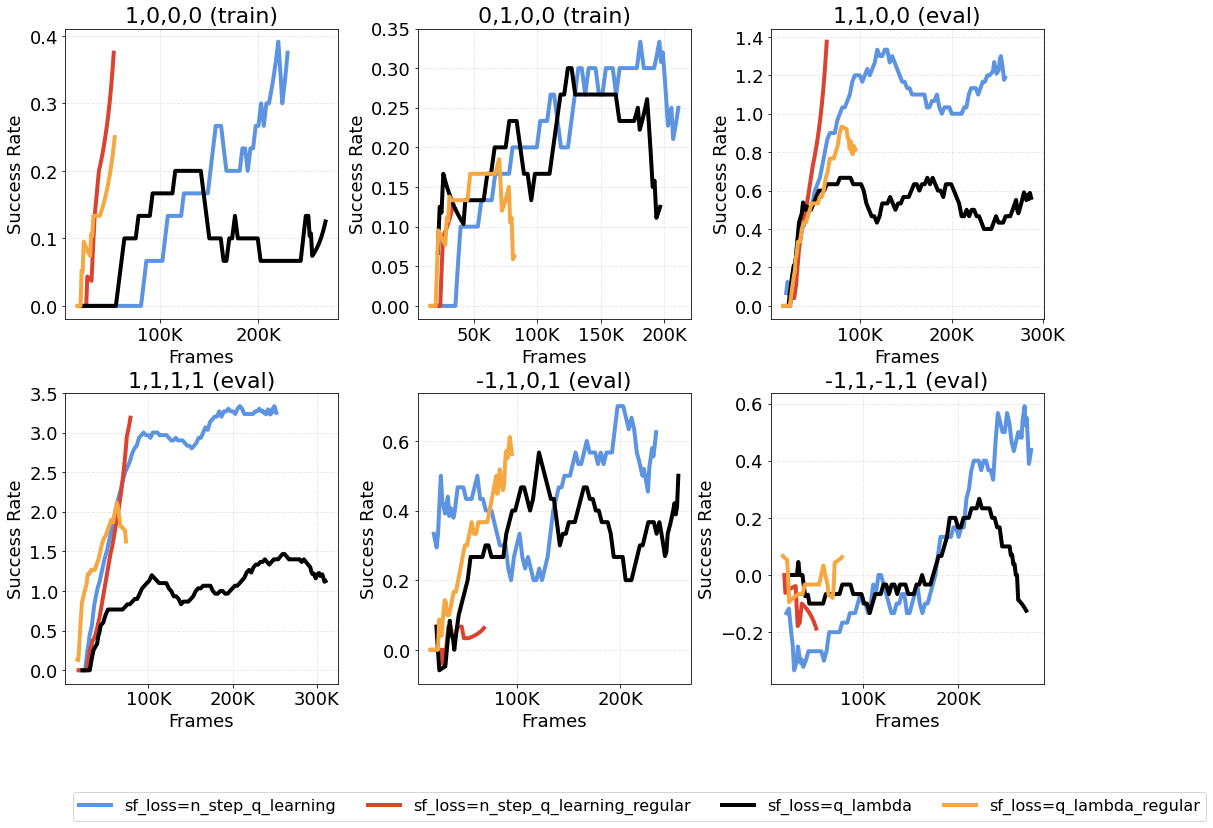

In [17]:
key_with_legend = 'evaluator/0.Task/1,1,1,1/EpisodeReturn'
filter_key = '1,1,1,1'
filter_key = '-1,1,0,1'

vis_tool = Vistool(
    tensorboard_data=run_data,
    key_with_legend=key_with_legend,
    filter_key=f'evaluator/0.Task/{filter_key}/EpisodeReturn',
    filter_column='max',
    # plot_data_kwargs=dict(xlabel_key=steps_key),
    plot_settings=
    [
        dict(
            key=f'evaluator/0.Task/{key}/EpisodeReturn',
            title=f"{key} (train)",
            ylabel="Success Rate",
            xlabel='Frames') 
        for key in ['1,0,0,0', '0,1,0,0']
    ] +
    [
        dict(
            key=f'evaluator/0.Task/{key}/EpisodeReturn',
            title=f"{key} (eval)",
            ylabel="Success Rate",
            xlabel='Frames') 
        for key in ['1,1,0,0', '1,1,1,1', '-1,1,0,1', '-1,1,-1,1']
    ],
)








# %debug
vis_tool.plot_filters(
    topk=1,
    legend_kwargs=dict(
                loc='lower left',
                bbox_to_anchor=(0,-.5), 
                ncol=4,
                ),
    maxcols=3,
    data_filter_space=dict(
        sf_loss=None,
        # variance=None,
        # duelling=None,
    ),
    display_settings=['sf_loss', "variance", "npolicies", "duelling"],
    plot_data_kwargs=dict(xlabel_key='evaluator/ActorSteps',
                          # n_samples=50,
                          rolling=30,
                          std_alpha=.1,
                          err_style='fill'),
    subplot_kwargs=dict(unit=5),
)

,num_seeds,sf_loss,variance,npolicies,duelling
0,1,n_step_q_learning,0.1,10,False
1,1,n_step_q_learning,0.5,10,False


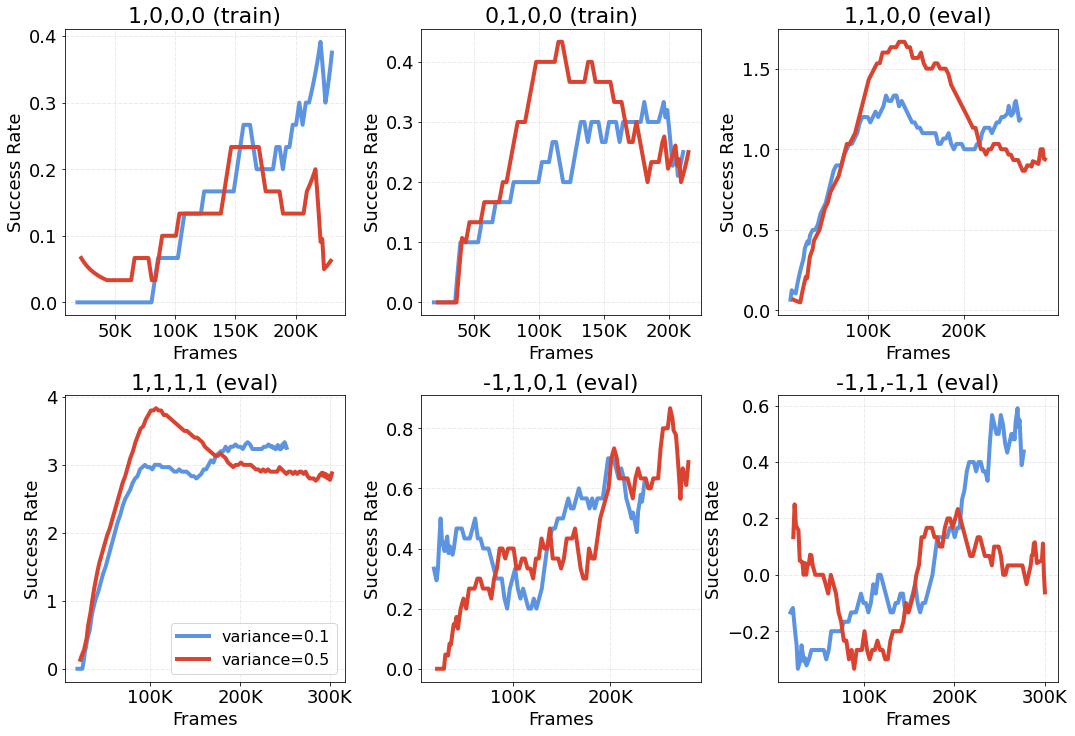

In [16]:

# %debug
vis_tool.plot_filters(
    topk=1,
    # legend_kwargs=dict(
    #             loc='lower left',
    #             bbox_to_anchor=(0,-.5), 
    #             ncol=4,
    #             ),
    maxcols=3,
    data_filter_space=dict(
        # sf_loss=None,
        variance=None,
        # duelling=None,
    ),
    display_settings=['sf_loss', "variance", "npolicies", "duelling"],
    plot_data_kwargs=dict(xlabel_key='evaluator/ActorSteps',
                          # n_samples=50,
                          rolling=30,
                          std_alpha=.1,
                          err_style='fill'),
    subplot_kwargs=dict(unit=5),
)